In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from scipy.stats import entropy
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy.spatial import ConvexHull, QhullError
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.ticker import FixedLocator

from matplotlib.colors import LinearSegmentedColormap
from matplotlib import font_manager as fm
import matplotlib as mpl
from matplotlib.colors import PowerNorm

In [2]:
concentration=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]
dispense_rate=[0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
parameter_pool=[]
for i in range(len(concentration)):
    for j in range(len(concentration)):
        for n in range(len(dispense_rate)):
            parameter=[concentration[i],concentration[j],dispense_rate[n]]
            parameter_pool.append(parameter)
 

In [3]:
parameter_pool=np.array(parameter_pool)       
parameter_pool

array([[0.05, 0.05, 0.02],
       [0.05, 0.05, 0.05],
       [0.05, 0.05, 0.1 ],
       ...,
       [0.55, 0.55, 0.8 ],
       [0.55, 0.55, 0.9 ],
       [0.55, 0.55, 1.  ]])

In [4]:
data=pd.read_excel('result.xlsx')[0:32]
data

,Unnamed: 0,acid_concentration/M,metal_concentration/M,depense_rate,Unnamed: 4,phase/ 0 alpha/1 beta/2 mix,Unnamed: 6,Ibeta,Ialpha,Ialpha/Itotal
0,1,0.40,0.40,1.00,NaN,2,NaN,307.20,648.95,0.678714
1,2,0.40,0.20,1.00,NaN,2,NaN,2031.05,355.97,0.149126
2,3,0.40,0.05,1.00,NaN,1,NaN,NaN,NaN,0.000000
3,4,0.20,0.40,1.00,NaN,2,NaN,1090.34,821.90,0.429811
4,5,0.20,0.20,1.00,NaN,2,NaN,1980.52,379.70,0.160875
5,6,0.20,0.05,1.00,NaN,1,NaN,NaN,NaN,0.000000
6,7,0.05,0.40,1.00,NaN,1,NaN,NaN,NaN,0.000000
7,8,0.05,0.20,1.00,NaN,1,NaN,NaN,NaN,0.000000
8,9,0.05,0.05,1.00,NaN,1,NaN,NaN,NaN,0.000000
9,10,0.40,0.40,0.20,NaN,2,NaN,4449.72,452.86,0.092372


In [5]:
X=data.iloc[:,1:4]

In [6]:
X=np.array(X)

In [7]:
len(X)

32

In [8]:

parameter_pool_tuples = [tuple(row) for row in parameter_pool]
X_tuples = set(tuple(row) for row in X)

sample_unlabeled = np.array([row for row in parameter_pool_tuples if row not in X_tuples])


In [9]:
print(len(sample_unlabeled))

1420


In [10]:
y=data[['phase/ 0 alpha/1 beta/2 mix']]

In [11]:
y=np.array(y).ravel()

In [12]:
y

array([2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

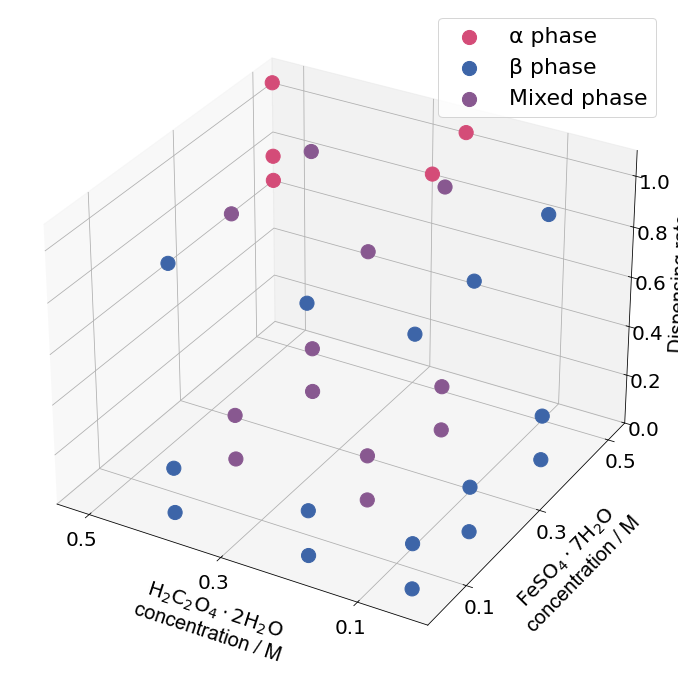

In [13]:




colors_list = ["#D44C78","#3D65A8", "#885890"]
labels = ['α phase', 'β phase', 'Mixed phase']

fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')

xticks = np.arange(0.1, 0.55, 0.2) 
yticks = np.arange(0.1, 0.55, 0.2)
zticks = np.arange(0, 1.05, 0.2)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_zticks(zticks)

unique_labels = np.unique(y)

for idx, label_value in enumerate(unique_labels):
    mask = (y ==
            label_value) 
   
    ax.scatter(
        X[mask, 0],
        X[mask, 1],
        X[mask, 2],
        color=colors_list[idx],
        label=labels[idx],   # assign label here, once per group
        s=200,alpha=1.0
    )




  

ax.set_xlabel(r'$\mathrm{H_2C_2O_4 \cdot 2H_2O}$' + '\n' + 'concentration / M', 
              fontsize=20, fontname='Arial', labelpad=20)

ax.set_ylabel(r'$\mathrm{FeSO_4 \cdot 7H_2O}$' + '\n' + 'concentration / M', 
              fontsize=20, fontname='Arial', labelpad=20)
ax.set_zlabel('Dispensing rate', fontsize=20, fontname='Arial',labelpad=10)

ax.set_xlim(0.55, 0)
ax.set_ylim(0, 0.55)
ax.set_zlim(0, 1.1)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='z', labelsize=20)

ax.legend(fontsize=22)
plt.tight_layout(pad=3.0)


plt.savefig("RF-iter0-data.png", dpi=300)
plt.show()


In [14]:
cv_scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5,scoring='accuracy')
mean_cv_acc = cv_scores.mean()
std_cv_acc = cv_scores.std()

sem_cv_acc = std_cv_acc / np.sqrt(len(cv_scores))
print(mean_cv_acc, sem_cv_acc)

0.9380952380952381 0.0340734167999968


In [15]:
RF_model=RandomForestClassifier(random_state=42)

In [16]:
RF_model.fit(X,y)

RandomForestClassifier(random_state=42)

In [17]:
probas = RF_model.predict_proba(sample_unlabeled)

In [18]:
uncertainty = 1 - np.max(probas, axis=1)

In [19]:
sem_uncertainty = np.std(uncertainty) / np.sqrt(len(uncertainty))
print(np.mean(uncertainty), sem_uncertainty)

0.20913380281690142 0.0038715511414877265


In [20]:




entropies = np.apply_along_axis(entropy, 1, probas)

print("Mean entropy:", np.mean(entropies))
print("SEM entropy:", np.std(entropies)/np.sqrt(len(entropies)))


Mean entropy: 0.5205154110255164
SEM entropy: 0.006950889858911432


In [21]:
top_indices = np.where(entropies>np.mean(entropies))[0]
X_candidates = sample_unlabeled[top_indices]

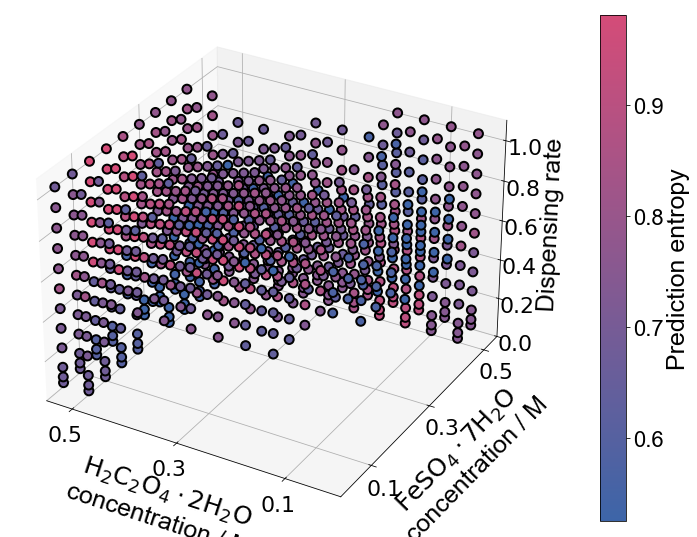

In [22]:


custom_cmap = LinearSegmentedColormap.from_list("#3D65A8_to_#D44C78", ["#3D65A8", "#D44C78"])

fig = plt.figure(figsize=(10, 12))

ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    X_candidates[:, 0], X_candidates[:, 1], X_candidates[:, 2],
    c=entropies[top_indices], cmap=custom_cmap, #norm=norm,
    s=80, edgecolors='black', linewidths=2,
    alpha=1.0
)

xticks = np.arange(0.1, 0.55, 0.2)
yticks = np.arange(0.1, 0.55, 0.2)
zticks = np.arange(0, 1.05, 0.2)

ax.xaxis.set_major_locator(FixedLocator(xticks))
ax.yaxis.set_major_locator(FixedLocator(yticks))
ax.zaxis.set_major_locator(FixedLocator(zticks))

# Set tick params for consistent font
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
ax.tick_params(axis='z', labelsize=22)

# Set font family for tick labels using rcParams or font_manager (font family does not always apply in 3D ticks)
# Alternative: set font globally

mpl.rcParams['font.family'] = 'Arial'

# Axis labels (fontname Arial)
ax.set_xlabel(r'$\mathrm{H_2C_2O_4 \cdot 2H_2O}$' + '\n' + 'concentration / M', 
              fontsize=25, fontname='Arial', labelpad=20)

ax.set_ylabel(r'$\mathrm{FeSO_4 \cdot 7H_2O}$' + '\n' + 'concentration / M', 
              fontsize=25, fontname='Arial', labelpad=20)
ax.set_zlabel('Dispensing rate', fontsize=25, fontname='Arial',labelpad=10)

ax.set_xlim(0.55, 0)
ax.set_ylim(0, 0.55)
ax.set_zlim(0, 1.1)

cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.ax.tick_params(labelsize=22) 
cbar.set_label(r"Prediction entropy", fontsize=25, fontname='Arial')

plt.tight_layout()


plt.savefig("entropy_higher_than_the_mean.png", dpi=300)
plt.show()


C:\Users\Tong_Zhao\anaconda3\envs\AI4MS\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


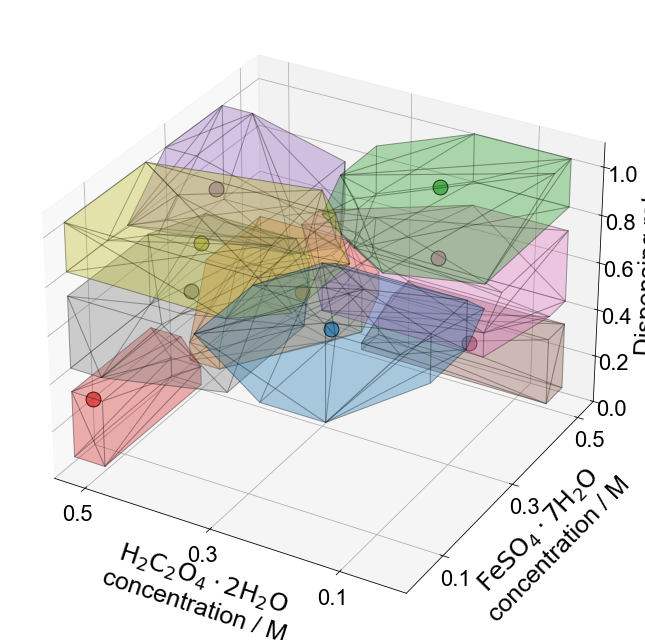

Selected query points:
 [[0.2  0.15 0.7 ]
 [0.45 0.5  0.2 ]
 [0.2  0.45 0.9 ]
 [0.55 0.1  0.2 ]
 [0.5  0.35 0.8 ]
 [0.2  0.55 0.1 ]
 [0.2  0.45 0.6 ]
 [0.45 0.2  0.6 ]
 [0.4  0.15 0.9 ]]


In [23]:
num_classes = 3
query_size = 9




kmeans = KMeans(n_clusters=query_size, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(X_candidates)


fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
xticks = np.arange(0.1, 0.55, 0.2)
yticks = np.arange(0.1, 0.55, 0.2)
zticks = np.arange(0, 1.05, 0.2)

ax.xaxis.set_major_locator(FixedLocator(xticks))
ax.yaxis.set_major_locator(FixedLocator(yticks))
ax.zaxis.set_major_locator(FixedLocator(zticks))

# Set tick params for consistent font
ax.tick_params(axis='x', labelsize=22)
ax.tick_params(axis='y', labelsize=22)
ax.tick_params(axis='z', labelsize=22)


cluster_colors = cm.tab10.colors  
norm = colors.Normalize(vmin=entropies[top_indices].min(), vmax=entropies[top_indices].max())

query_indices = []

for i in range(query_size):
    cluster_mask = (clusters == i)
    cluster_points = X_candidates[cluster_mask]
    cluster_idx = np.where(cluster_mask)[0]
    cluster_entropies = entropies[top_indices][cluster_mask]
    range_ = cluster_entropies.max() - cluster_entropies.min()
    if range_ == 0:
        normalized_cluster_entropies = np.ones_like(cluster_entropies)
    else:
       
        normalized_cluster_entropies=(cluster_entropies - cluster_entropies.min()) / (cluster_entropies.max() - cluster_entropies.min())
        

    if len(cluster_idx) == 0:
        continue  
    weights = normalized_cluster_entropies
    weighted_center = np.average(cluster_points, axis=0, weights=weights)
   
    

    distances = np.linalg.norm(cluster_points - weighted_center, axis=1)
    closest = cluster_idx[np.argmin(distances)]
    query_indices.append(top_indices[closest])
    closest_point = X_candidates[closest]
    #closest_entropy = normalized_entropies[top_indices][closest]


    try:
        hull = ConvexHull(cluster_points)
        verts = [cluster_points[simplex] for simplex in hull.simplices]
        poly = Poly3DCollection(
            verts,
            facecolor=cluster_colors[i % len(cluster_colors)],
            alpha=0.2,
            edgecolor='black',
            linewidth=1.0,
        )
        ax.add_collection3d(poly)
    except QhullError:
  
        pass

    base_rgb = cluster_colors[i % len(cluster_colors)][:3]
    point_color = (*base_rgb, 0.7)
    ax.scatter(*closest_point, c=[point_color], marker='o', s=220, edgecolor='k', zorder=6)
    #ax.scatter(*weighted_center, c=[point_color], marker='*', s=200, edgecolor='k', zorder=6)

 
    label = f"({closest_point[0]:.2f}, {closest_point[1]:.2f}, {closest_point[2]:.2f})"
    #ax.text(closest_point[0], closest_point[1], closest_point[2] + 0.02, label, fontsize=18, color='red')





# Axes labels and limits

ax.set_xlabel(r'$\mathrm{H_2C_2O_4 \cdot 2H_2O}$' + '\n' + 'concentration / M', 
              fontsize=25, fontname='Arial', labelpad=20)

ax.set_ylabel(r'$\mathrm{FeSO_4 \cdot 7H_2O}$' + '\n' + 'concentration / M', 
              fontsize=25, fontname='Arial', labelpad=20)
ax.set_zlabel('Dispensing rate', fontsize=25, fontname='Arial',labelpad=10)
ax.set_xlim(0.55, 0)
ax.set_ylim(0, 0.55)
ax.set_zlim(0, 1.1)
plt.tight_layout()
plt.savefig("mass_center_round0.png", dpi=300)
plt.show()

X_query = sample_unlabeled[query_indices]
print("Selected query points:\n", X_query)
